In [16]:
# From scratch
import random
import torch
from d2l import torch as d2l
import numpy as np
from torch.utils import data

In [17]:
def synthetic_data(w, b, num_examples): #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [18]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [19]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.3059, -1.0481]) 
label: tensor([7.1670])


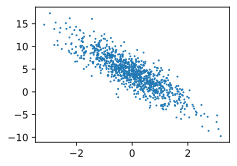

In [20]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [23]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [24]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.6969, -0.4435],
        [ 0.0371,  0.6155],
        [ 1.9468, -0.0972],
        [-0.0343,  1.3157],
        [-2.1674,  0.6480],
        [-1.5106,  0.6685],
        [-0.1360, -0.5893],
        [ 0.1101, -1.6207],
        [-0.6112, -1.2662],
        [-0.1673, -0.1914]]) 
 tensor([[ 7.0949],
        [ 2.1866],
        [ 8.4273],
        [-0.3360],
        [-2.3400],
        [-1.0861],
        [ 5.9078],
        [ 9.9231],
        [ 7.2814],
        [ 4.5154]])


In [25]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [26]:
def linreg(X, w, b): #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y): #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size): #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [27]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size) # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.037999
epoch 2, loss 0.000139
epoch 3, loss 0.000049


In [28]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0016, -0.0003], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0013], grad_fn=<RsubBackward1>)
